# Google Playstore Case Study

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [1]:
#importing the libraries
import pandas as pd
import numpy as np

In [2]:
#reading the dataset and checking the first five rows
inp = pd.read_csv("googleplaystore.csv")
inp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Checking the shape of the dataframe
inp.shape

(10841, 13)

In [4]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


### Data Handling and Cleaning

In [5]:
#Checking the datatypes of all the columns of the dataframe
inp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Missing Value Treatment

In [6]:
#Checking the number of null values in the columns
inp.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [7]:
#Droping the rows having null values in the Rating field
inp1 = inp[~inp["Rating"].isnull()]

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [8]:
# Checking the number of nulls in the Rating field again to cross-verify
inp1["Rating"].isnull().sum()

0

In [9]:
inp1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [10]:

#Checking the number of nulls in the dataframe again and finding the total number of null values

arr1 = np.array(inp1.isna().sum())
arr1.sum()

8

In [11]:
#Inspecting the nulls in the Android Version column
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
inp1.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [13]:
#Droping the row having shifted values
inp1 = inp1[~(inp1["Android Ver"].isnull() & (inp1.Category == "1.9"))]
#Checking the nulls again in Android version column to cross-verify
inp1[inp1["Android Ver"].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [14]:
inp1["Android Ver"].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [15]:
#Checking the most common value in the Android version column
inp1["Android Ver"].mode()

0    4.1 and up
dtype: object

In [16]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
#Filling up the nulls in the Android Version column with the above value
inp1["Android Ver"] = inp1["Android Ver"].fillna(inp1["Android Ver"].mode()[0])

In [18]:
#Checking the nulls in the Android version column again to cross-verify
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
#Checking the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [20]:
#Checking the most common value in the Current version column
inp1["Current Ver"].mode()

0    Varies with device
dtype: object

In [21]:
#Replacing the nulls in the Current version column with the above value
inp1["Current Ver"] = inp1["Current Ver"].fillna(inp1["Current Ver"].mode()[0])

In [22]:
#Checking the most common value in the Current version column again
inp1["Current Ver"].mode()

0    Varies with device
dtype: object

In [23]:
inp1[inp1["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [24]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Handling Incorrect Data Types 

In [25]:
#Checking the datatypes of all the columns 
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [26]:
inp1 = inp1.reset_index(drop=True)

In [27]:
inp1.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9356,Manga-FR - Anime Vostfr,COMICS,3.4,291,13000.000000,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
9357,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7400.000000,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
9358,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2300.000000,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
9359,FR Tides,WEATHER,3.8,1195,582.000000,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
9360,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
9361,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9362,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9363,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9364,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9365,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [28]:
#Analysing the Price column to check the issue

inp1["Price"].dtype

dtype('O')

In [29]:
inp1["Price"].value_counts()

0        8719
$2.99     114
$0.99     107
$4.99      70
$1.99      59
         ... 
$1.75       1
$1.50       1
$1.97       1
$2.59       1
$3.08       1
Name: Price, Length: 73, dtype: int64

In [30]:
#Writing the function to make the changes
inp1["Price"] = inp1["Price"].apply(lambda x : 0 if x == "0" else float(x[1:]))

In [31]:
#Verifying the dtype of Price once again
inp1["Price"].dtype

dtype('float64')

In [32]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [33]:
#Analysing the Reviews column
inp1["Reviews"]

0          159
1          967
2        87510
3       215644
4          967
         ...  
9361         7
9362        38
9363         4
9364       114
9365    398307
Name: Reviews, Length: 9366, dtype: object

In [34]:
#Changing the dtype of this column

inp1.Reviews = inp1.Reviews.astype("int32")
inp1.Reviews.dtype
#Checking the quantitative spread of this dataframe

inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [35]:
#Analysing the Installs Column
inp1.Installs.value_counts()


1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [36]:
#Cleaning the Installs Column and finding the approximate number of apps at the 50th percentile.
inp1.Installs = inp1.Installs.apply(lambda x : x[ :-1])
inp1.Installs.value_counts()


1,000,000        1577
10,000,000       1252
100,000          1150
10,000           1010
5,000,000         752
1,000             713
500,000           538
50,000            467
5,000             432
100,000,000       409
100               309
50,000,000        289
500               201
500,000,000        72
10                 69
1,000,000,000      58
50                 56
5                   9
1                   3
Name: Installs, dtype: int64

In [37]:
inp1.Installs = inp1.Installs.apply(lambda x :x.replace("," , ""))
inp1.Installs.value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [38]:
inp1.Installs = inp1.Installs.astype("int32")
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [39]:
#Perform the sanity checks on the Reviews column
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [40]:
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [41]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2342,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4467,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5539,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6149,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
6622,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
7598,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9266,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [42]:
## Removing these record where install<reviews
inp1 = inp1[inp1.Reviews<=inp1.Installs]

In [43]:
inp1[(inp1.Reviews > inp1.Installs)].shape

(0, 13)

In [44]:
inp1[(inp1.Price > 0) & (inp1.Type == "Free")].shape

(0, 13)

#### Outliers Analysis Using Boxplot

In [45]:
#importing the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

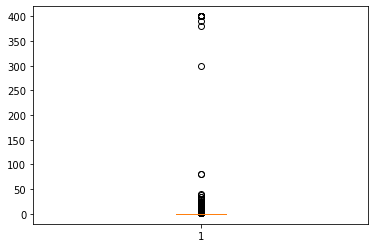

In [46]:
#Creating a box plot for the price column
plt.boxplot(inp1.Price)
plt.show()

In [47]:
#Checking the apps with price more than 200
inp1[inp1["Price"] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4038,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4191,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4196,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5046,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5049,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5050,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5051,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5052,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5053,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5054,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


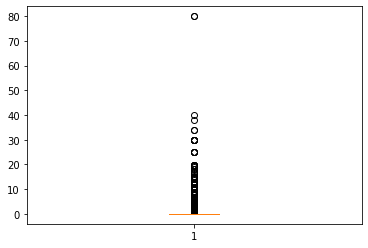

In [48]:
#Cleaning the Price column
inp1 =inp1[inp1["Price"] < 200]
plt.boxplot(inp1.Price)
plt.show()

In [49]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<ipython-input-50-ef221ae5a959>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  inp1.paid = inp1[inp1["Type"]== "Paid"]


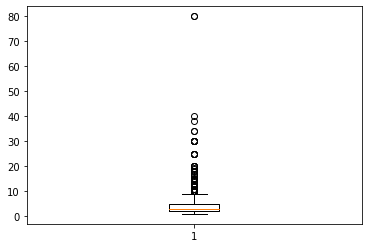

In [50]:
#Creating a box plot for paid apps
inp1.paid = inp1[inp1["Type"]== "Paid"]
plt.boxplot(inp1.paid["Price"])
plt.show()


In [51]:
#Checking the apps with price more than 30
inp1[inp1["Price"] > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2170,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2215,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2278,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2314,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2326,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5055,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [52]:
#Cleaning the Price column again
inp1 =inp1[inp1["Price"] < 30]

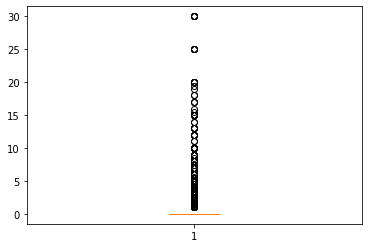

In [53]:
plt.boxplot(inp1["Price"])
plt.show()

In [54]:
inp1.shape


(9338, 13)

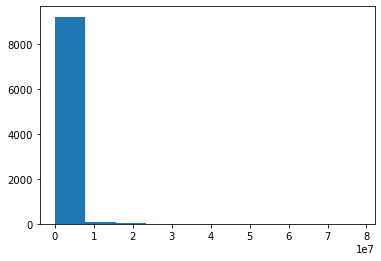

In [55]:
#Creating a histogram of the Reviews
%matplotlib inline
plt.hist(inp1.Reviews)
plt.show()

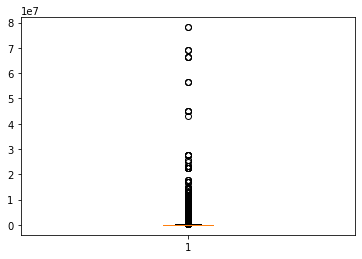

In [56]:
#Creating a boxplot of the Reviews column

plt.boxplot(inp1.Reviews)
plt.show()

In [57]:
#Checking records with 1 million reviews
inp1[inp1["Reviews"]>10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
323,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
324,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
330,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
366,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
369,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
6726,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7075,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
7863,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [58]:
inp1.shape

(9338, 13)

In [59]:
#Droping the above records

inp1 = inp1[inp1["Reviews"]<=1000000]
inp1.shape

(8634, 13)

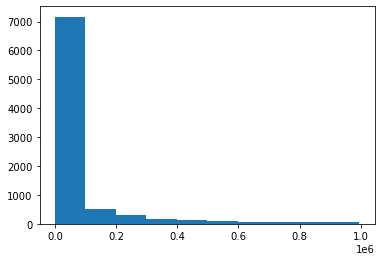

In [60]:
#Creating a histogram again and check the peaks
plt.hist(inp1.Reviews)
plt.show()


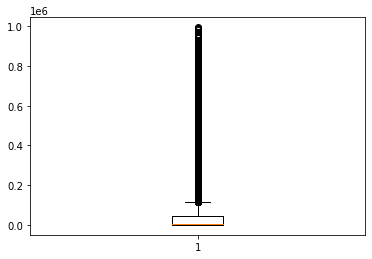

In [61]:
plt.boxplot(inp1.Reviews)
plt.show()

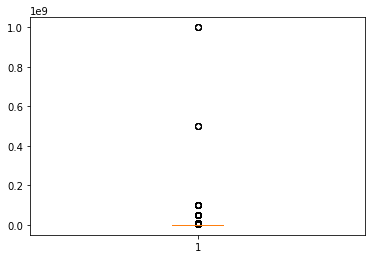

In [62]:
#Creating a box plot for the Installs column 
%matplotlib inline
plt.boxplot(inp1.Installs)
plt.show()


In [63]:
inp1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [64]:
#CLeaning the Installs by removing all the apps having more than or equal to 100 million installs

inp1 = inp1[inp1["Installs"]<=100000000]
inp1.shape

(8624, 13)

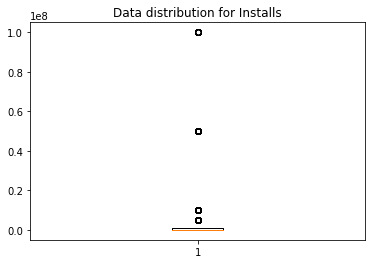

In [65]:
#Plot a histogram for Size as well.
plt.boxplot(inp1.Installs)
plt.title("Data distribution for Installs")
plt.show()

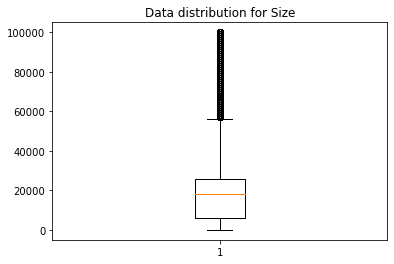

In [66]:
## A boxplot for the Size column
plt.boxplot(inp1.Size)
plt.title("Data distribution for Size")
plt.show()


#### Distribution Plots

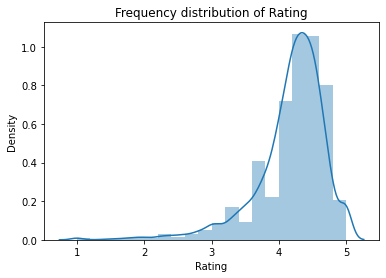

In [67]:
#Create a distribution plot for rating
import warnings
warnings.filterwarnings("ignore")
sns.distplot(inp1.Rating, bins =20)
plt.title("Frequency distribution of Rating")
plt.style.use("ggplot")
plt.show()

In [68]:
inp1 = inp1[~inp1['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [69]:
#Analyse the Content Rating column
inp1.Rating.describe()

count    8620.000000
mean        4.172622
std         0.529236
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Content distribution for Rating')

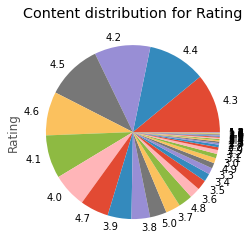

In [70]:
plt.style.use("ggplot")
inp1.Rating.value_counts().plot.pie()
plt.title("Content distribution for Rating")

In [71]:

#we need to drop some low frequency ratings
inp1.Rating.value_counts()

4.3    946
4.4    931
4.2    896
4.5    890
4.6    700
4.1    692
4.0    551
4.7    455
3.9    381
3.8    297
5.0    268
3.7    236
4.8    226
3.6    172
3.5    160
3.4    128
3.3    102
4.9     87
3.0     83
3.1     69
3.2     64
2.9     44
2.8     42
2.7     25
2.6     25
2.5     21
2.3     20
2.4     19
1.0     16
2.2     14
1.9     13
2.0     12
2.1      8
1.8      8
1.7      8
1.6      4
1.5      3
1.4      3
1.2      1
Name: Rating, dtype: int64

In [72]:
#Remove the rows with values which are less represented 
inp1[inp1["Rating"]> 2].shape

(8552, 13)

In [73]:
#Reset the index
inp1.reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8615,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8616,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8617,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8618,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [74]:
#Check the apps belonging to different categories of Content Rating 
inp1.Category.value_counts()

FAMILY                 1675
GAME                    848
TOOLS                   695
MEDICAL                 344
FINANCE                 315
PRODUCTIVITY            310
SPORTS                  307
LIFESTYLE               304
BUSINESS                298
PERSONALIZATION         295
HEALTH_AND_FITNESS      290
PHOTOGRAPHY             267
COMMUNICATION           249
NEWS_AND_MAGAZINES      223
SHOPPING                214
SOCIAL                  212
TRAVEL_AND_LOCAL        211
DATING                  195
BOOKS_AND_REFERENCE     174
EDUCATION               147
VIDEO_PLAYERS           145
ENTERTAINMENT           140
MAPS_AND_NAVIGATION     119
FOOD_AND_DRINK          107
HOUSE_AND_HOME           76
AUTO_AND_VEHICLES        73
WEATHER                  69
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

Text(0.5, 1.0, 'Data distribution for Category')

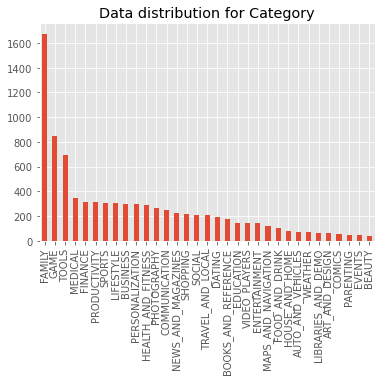

In [75]:
#Plot a bar chart
inp1.Category.value_counts().plot.bar()
plt.title("Data distribution for Category")

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

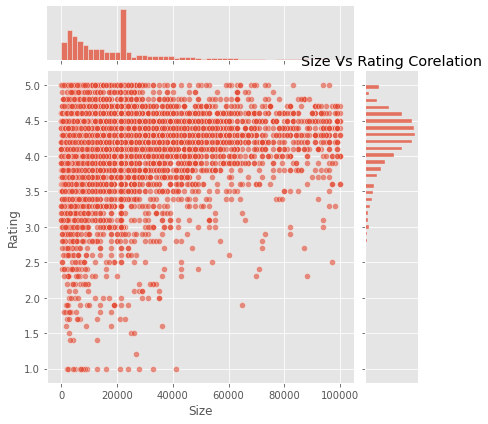

In [76]:
###Size vs Rating

sns.jointplot(inp1.Size, inp1.Rating,alpha = 0.6)
plt.title("Size Vs Rating Corelation")
plt.show()

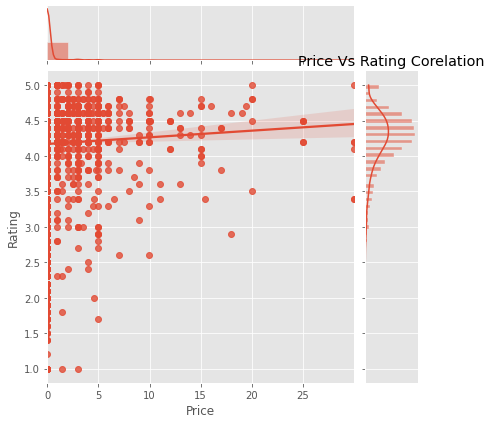

In [77]:
# reg plot for Price and Rating and observe the trend

sns.jointplot(inp1.Price, inp1.Rating, kind = "reg")
plt.title("Price Vs Rating Corelation")
plt.show()


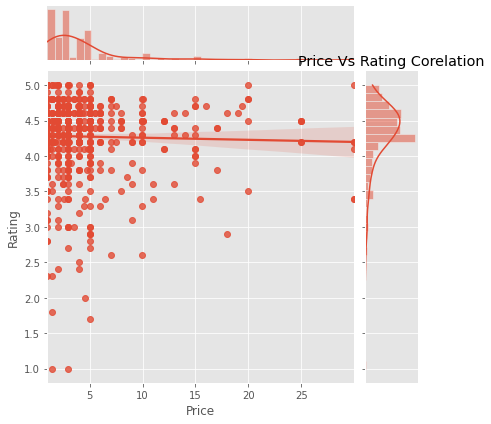

In [78]:
## reg plot for Price and Rating again for only the paid apps.
inp2 = inp1[inp1["Price"]>0]
sns.jointplot(inp2.Price, inp2.Rating,kind = "reg")
plt.title("Price Vs Rating Corelation")
plt.show()

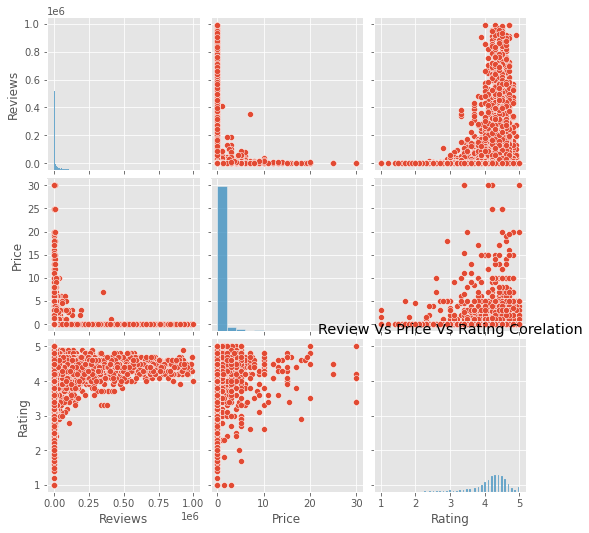

In [79]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp1[["Reviews","Price","Rating"]])
plt.title("Review Vs Price Vs Rating Corelation")
plt.show()

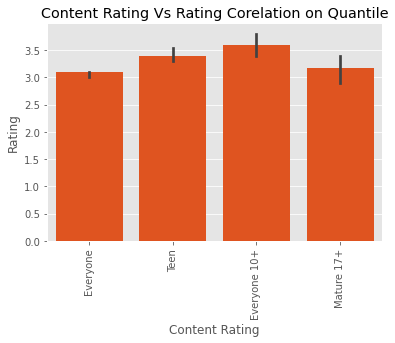

In [80]:
##Plot a bar plot of Content Rating vs Average Rating 
sns.barplot(data = inp1, x = "Content Rating", y = "Rating" , estimator = lambda x : np.quantile(x,0.05), color = "orangered")
plt.xticks(rotation =90)
plt.title("Content Rating Vs Rating Corelation on Quantile")
plt.show()

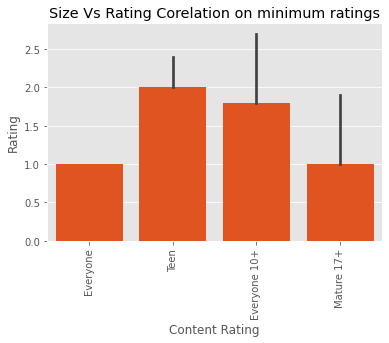

In [81]:
# the bar plot with the minimum Rating
sns.barplot(data = inp1, x = "Content Rating", y = "Rating" , estimator = lambda x : min(x), color = "orangered")
plt.xticks(rotation =90)
plt.title("Size Vs Rating Corelation on minimum ratings")
plt.show()

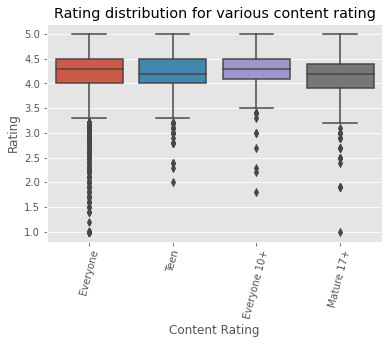

In [82]:
##Plot a box plot of Rating vs Content Rating
sns.boxplot(inp1["Content Rating"], inp1.Rating)
plt.title("Rating distribution for various content rating")
plt.xticks(Rotation = 75)
plt.show()

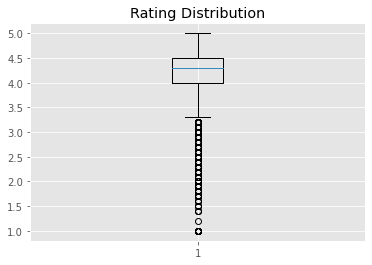

In [83]:
##Question - Plot a box plot for the Rating column only
plt.boxplot(inp1.Rating)
plt.title("Rating Distribution")
plt.show()

In [84]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [85]:
inp1['Genres'].value_counts()

Tools                                  694
Entertainment                          508
Education                              464
Medical                                344
Finance                                315
                                      ... 
Adventure;Brain Games                    1
Lifestyle;Education                      1
Health & Fitness;Action & Adventure      1
Arcade;Pretend Play                      1
Strategy;Creativity                      1
Name: Genres, Length: 115, dtype: int64

In [86]:
#box plot of Ratings across the 4 most popular Genres
c = ['Tools','Entertainment','Medical','Education']
inp3= inp1[inp1['Genres'].isin(c)]

Text(0.5, 1.0, 'Rating Distribution for various Genres')

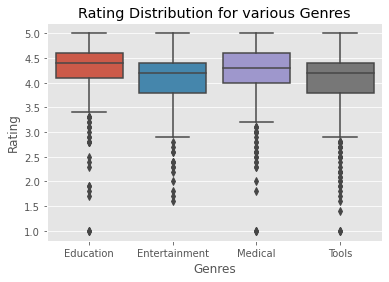

In [87]:
sns.boxplot(inp3['Genres'],inp1.Rating)
plt.title("Rating Distribution for various Genres")

In [88]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut

inp1['Size_category'] = pd.qcut(inp1.Size, [0,0.2,0.4,0.6,0.8,1],("VS","S","M","L","VL"))
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,S
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,L
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VS


In [89]:
##pivot table for Size_category and Content Rating with values set to Rating
inp_pivot1 = inp1.pivot_table(index = "Size_category", columns = "Content Rating" , values = "Rating" , aggfunc = lambda x : np.quantile(x,0.20))
inp_pivot1 

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_category,,,,
VS,3.8,3.86,3.30,3.8
S,3.8,3.92,3.68,3.9
M,4.0,4.10,3.70,3.9
L,3.8,4.00,3.90,4.0
VL,3.9,4.00,4.00,4.0


Text(0.5, 1.0, 'Size Vs Content Rating Corelation')

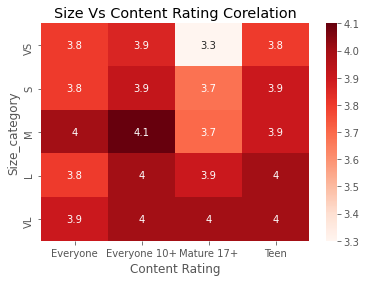

In [90]:
##Plot a heat map
sns.heatmap(inp_pivot1, cmap = "Reds", annot = True)
plt.title("Size Vs Content Rating Corelation")

In [91]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
inp1['Review_bucket'] = pd.qcut(inp1.Reviews, [0,0.2,0.4,0.6,0.8,1],("Very Low","Low","Average","High","Very high"))
inp1.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_category,Review_bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,Low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,Low
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,S,Very high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,L,Very high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VS,Low


In [92]:

inp_pivot2 = inp1.pivot_table(index = "Size_category", columns = "Review_bucket" , values = "Rating" , aggfunc = lambda x : min(x))
inp_pivot2 

Review_bucket,Very Low,Low,Average,High,Very high
Size_category,,,,,
VS,1.0,1.6,1.8,2.4,3.3
S,1.0,1.7,1.7,3.3,3.4
M,1.0,1.9,2.5,3.0,3.2
L,1.0,2.1,2.7,2.9,2.8
VL,1.0,1.6,2.1,3.1,3.3


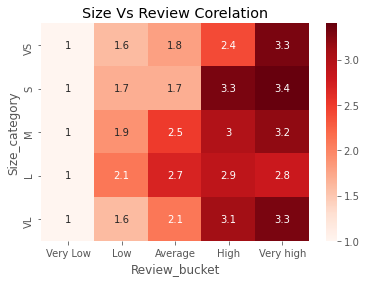

In [93]:
sns.heatmap(inp_pivot2, cmap = "Reds", annot = True)
plt.title("Size Vs Review Corelation")
plt.show()

In [94]:
## Extract the month from the Last Updated Date
inp1["Month"] = pd.DatetimeIndex(inp1["Last Updated"]).month
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_category,Review_bucket,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,Low,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,Low,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,S,Very high,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,L,Very high,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VS,Low,6


In [95]:
## Find the average Rating across all the months
inp_pivot3 = inp1.pivot_table(index = "Month", values = "Rating", aggfunc = "sum")
inp_pivot3

,Rating
Month,
1,1682.4
2,1701.6
3,2218.3
4,1982.9
5,3322.7
6,4414.6
7,10443.4
8,5347.4
9,1034.6


Text(0.5, 1.0, 'Monthly Rating Time-series variation')

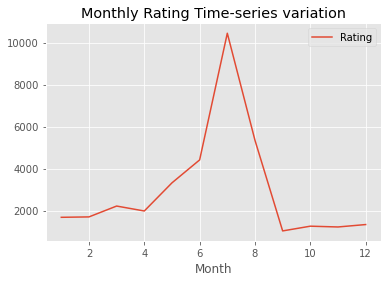

In [96]:
## Plot a line graph
inp_pivot3.plot(kind = "line")
plt.title("Monthly Rating Time-series variation")

In [97]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
inp_pivot4 = inp1.pivot_table(index = "Month", columns = "Content Rating", values = "Installs", aggfunc = sum)
inp_pivot4

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Month,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733712e+08,23300000.0,5259000.0,1.616194e+08
5,1.861068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427171e+09,317727100.0,145257200.0,4.157166e+08
7,7.771110e+09,456556000.0,419491910.0,1.943557e+09
8,5.930943e+09,215821000.0,312981700.0,1.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


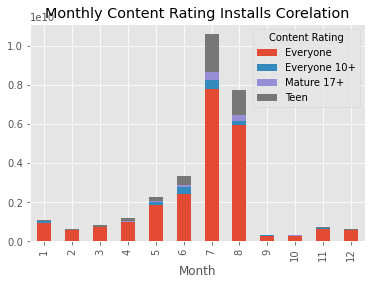

In [98]:
##stacked bar chart.
inp_pivot4.plot(kind = "bar" , stacked = "True")
plt.title("Monthly Content Rating Installs Corelation")
plt.show()

In [99]:
##Plot the stacked bar chart again wrt to the proportions.
inp_pivot5 = inp_pivot4[["Everyone", "Everyone 10+","Mature 17+" , "Teen"]].apply(lambda x : x/x.sum(), axis = 1)
inp_pivot5

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Month,,,,
1,0.853262,0.097076,0.008945,0.040717
2,0.882747,0.032083,0.021077,0.064093
3,0.853576,0.037222,0.011184,0.098018
4,0.836553,0.020025,0.004520,0.138902
5,0.833785,0.052943,0.022463,0.090808
6,0.734200,0.096110,0.043939,0.125751
7,0.733766,0.043109,0.039609,0.183515
8,0.768496,0.027965,0.040554,0.162985
9,0.839928,0.080434,0.007101,0.072537


<Figure size 1080x720 with 0 Axes>

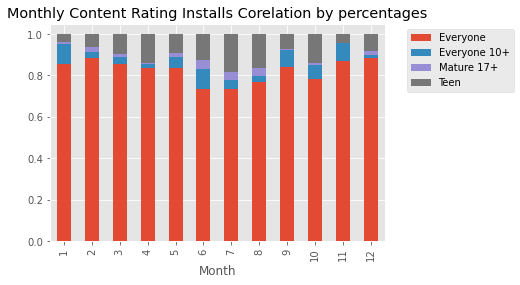

In [100]:
plt.figure(figsize=[15,10])
inp_pivot5.plot(kind = "bar", stacked = "True")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Monthly Content Rating Installs Corelation by percentages")
plt.show()

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [101]:
#Install plotly
!pip install plotly
import plotly.express as px

In [102]:
#Take the table you want to plot in a separate variable
res = inp1.groupby(["Month"])[['Rating']].mean()
res.reset_index(inplace=True)

In [104]:
#Prepare the plot
fig = px.line(res, x="Month",y="Rating",title="Montly average rating")
fig.show()